# Task for Today
1. White Wine Quality Prediction
Given data about various wines.let's try to predict
the quality ofa particular wine, according to experts.


In [39]:
#importing library
import numpy as np 
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

In [14]:
#loading the dataset 
df=pd.read_csv('../input/white-wine-quality/winequality-white.csv',delimiter=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


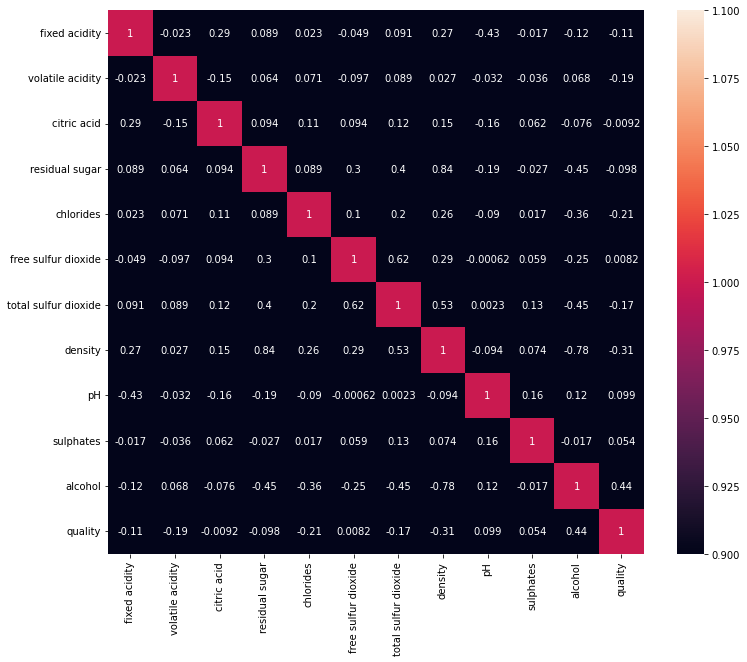

In [40]:
corr=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,vmin=1.0,vmax=1.0)
plt.show()

In [15]:
#getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [16]:
print('Total null values',df.isna().sum())

Total null values fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [17]:
#checking for unique value in quality column
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [18]:
encoder=LabelEncoder()
df['quality']=encoder.fit_transform(df['quality'])
{index:label for index,label in enumerate(encoder.classes_)}

{0: 3, 1: 4, 2: 5, 3: 6, 4: 7, 5: 8, 6: 9}

In [19]:
df['quality']

0       3
1       3
2       3
3       3
4       3
       ..
4893    3
4894    2
4895    3
4896    4
4897    3
Name: quality, Length: 4898, dtype: int64

In [20]:
y=df['quality']
x=df.drop('quality',axis=1)

In [22]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [24]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [25]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572


In [27]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

# Model and training

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3428, 11)
(1470, 11)
(3428,)
(1470,)


In [31]:
num_features=x.shape[1]
print(num_features)

11


In [29]:
#checking for number of classes
num_classes=len(y.unique())
print(num_classes)

7


In [33]:
#here input will be number of features
inputs=tf.keras.Input(shape=(num_features,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(num_classes,activation='softmax')(x)
model=tf.keras.Model(inputs=inputs,outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 455       
Total params: 5,383
Trainable params: 5,383
Non-trainable params: 0
_________________________________________________________________


In [35]:
#compiling the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
batch_size=32
epochs=100
history=model.fit(x_train,y_train,validation_split=0.2,
                 batch_size=batch_size,
                 epochs=epochs)

2022-06-13 02:18:54.866683: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
86/86 [==============================] - 1s 5ms/step - loss: 1.4299 - accuracy: 0.4628 - val_loss: 1.1894 - val_accuracy: 0.5102
Epoch 2/100
86/86 [==============================] - 0s 3ms/step - loss: 1.1441 - accuracy: 0.5551 - val_loss: 1.1398 - val_accuracy: 0.5335
Epoch 3/100
86/86 [==============================] - 0s 3ms/step - loss: 1.0916 - accuracy: 0.5704 - val_loss: 1.1120 - val_accuracy: 0.5277
Epoch 4/100
86/86 [==============================] - 0s 3ms/step - loss: 1.0644 - accuracy: 0.5711 - val_loss: 1.0935 - val_accuracy: 0.5554
Epoch 5/100
86/86 [==============================] - 0s 3ms/step - loss: 1.0401 - accuracy: 0.5784 - val_loss: 1.0895 - val_accuracy: 0.5510
Epoch 6/100
86/86 [==============================] - 0s 3ms/step - loss: 1.0224 - accuracy: 0.5795 - val_loss: 1.0851 - val_accuracy: 0.5554
Epoch 7/100
86/86 [==============================] - 0s 3ms/step - loss: 1.0134 - accuracy: 0.5788 - val_loss: 1.0746 - val_accuracy: 0.5583
Epoch 8/100
8

In [36]:
y.value_counts()

3    2198
2    1457
4     880
5     175
1     163
0      20
6       5
Name: quality, dtype: int64

In [41]:
#Re-structure the task:
#quantile spitting the outputs into two categories
#high quality wines and low quality wines
df['quality'].value_counts()

3    2198
2    1457
4     880
5     175
1     163
0      20
6       5
Name: quality, dtype: int64

In [43]:
pd.qcut(df['quality'],q=2,labels=[0,1]).value_counts()

0    3838
1    1060
Name: quality, dtype: int64

In [44]:
y=pd.qcut(df['quality'],q=2,labels=[0,1])
x=df.drop('quality',axis=1)

In [45]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4893    0
4894    0
4895    0
4896    1
4897    0
Name: quality, Length: 4898, dtype: category
Categories (2, int64): [0 < 1]

In [47]:
#here input will be number of features
inputs=tf.keras.Input(shape=(num_features,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x)
model=tf.keras.Model(inputs=inputs,outputs=outputs)
model.summary()


#compiling the model
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
batch_size=32
epochs=100
history=model.fit(x_train,y_train,validation_split=0.2,
                 batch_size=batch_size,
                 epochs=epochs)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
86/86 [==============================] - 1s 5ms/step - loss: -7.1770 - accuracy: 0.0299 - val_loss: -24.5496 - val_accuracy: 0.0335
Epoch 2/100
86/86 [==============================] - 0s 3ms/step - loss: -91.7039 - accuracy: 0.0310 - val_loss

In [49]:
#Result
fig=px.line(
    history.history,
    y=['loss','val_loss'],
    labels={'x':'Epochs','y':'Loss'},
    title='Loss over Time')
fig.show()

In [50]:
model.evaluate(x_test,y_test)

46/46 [==============================] - 0s 2ms/step - loss: -16042472.0000 - accuracy: 0.0374


[-16042472.0, 0.03741496428847313]